# Linear regression on projections

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
import operate_datasets
import model_visualisation
import model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'projection')

X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

In [4]:
#min_clip = 25
#X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)

In [6]:
X_train.shape

(27000, 2010)

## Fit regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [8]:
reg_l2 = LinearRegression().fit(X_train, y_train) # positive=True ?
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = reg_l2.score(X_train, y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.05031418429136869


In [9]:
y_pred_l2 = y_pred_l2.clip(0)

## Visualise results

In [10]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [11]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [ 7.59085151e+08  7.59085151e+08  7.59085151e+08 ... -2.26133079e+09
 -2.26133079e+09 -2.26133079e+09]
b 0.19907932217996696


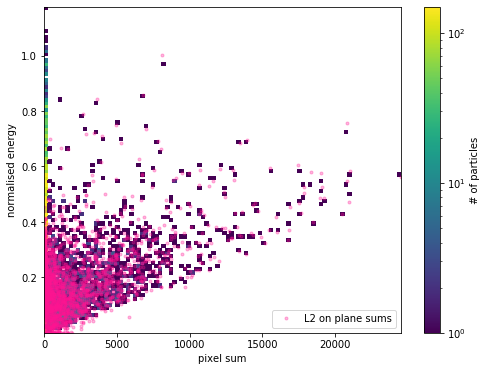

In [12]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred_l2, 'L2 on plane sums') 

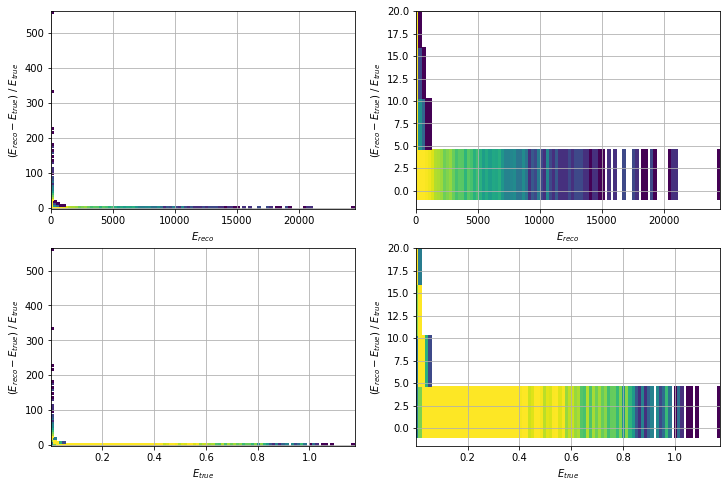

In [13]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred_l2) 

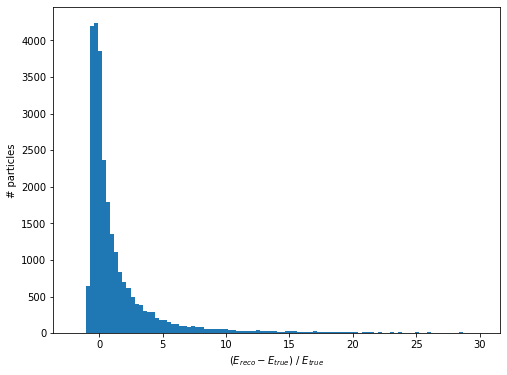

In [14]:
model_visualisation.plot_res_hist(y_train, y_pred_l2, (-2, 30))

In [15]:
model_evaluation.get_scores(y_train, y_pred_l2)

explained_variance_score 0.05068362195797638
max_error 0.9771286508803272
mean_absolute_error 0.12958776035729724
mean_squared_error 0.0299650710230419
mean_squared_log_error 0.01777053177781536
median_absolute_error 0.110255733514025
r2_score 0.05068344821067838


{'explained_variance_score': 0.05068362195797638,
 'max_error': 0.9771286508803272,
 'mean_absolute_error': 0.12958776035729724,
 'mean_squared_error': 0.0299650710230419,
 'mean_squared_log_error': 0.01777053177781536,
 'median_absolute_error': 0.110255733514025,
 'r2_score': 0.05068344821067838}